# 3d galaxy (--volume-prior) volume prior visualization
This is some code to check that the 3d volumetric galaxy prior looks sane. To use it, run gb_mcmc with --galaxy-prior and --verbose. gb_mcmc will output 3dgalaxyprior.dat to its working directory.
This code imports that file and makes some histograms of the prior itself.

In [134]:
import numpy as np
a = np.loadtxt("/home/mtauraso/src/ldasoft/rundir70/3dvolumeprior.dat", 
               [('x', 'double'), ('y', 'double'), ('z', 'double'), ('logp', 'double')])

print(a['z'])
print(len(a))
print(a['logp'])

[-0.05813094 -0.1743928  -0.2906547  ... 16.11658    16.19818
 16.27978   ]
8000000
[ -6.480137  -6.637781  -6.936426 ... -97.79466  -98.27438  -98.75412 ]


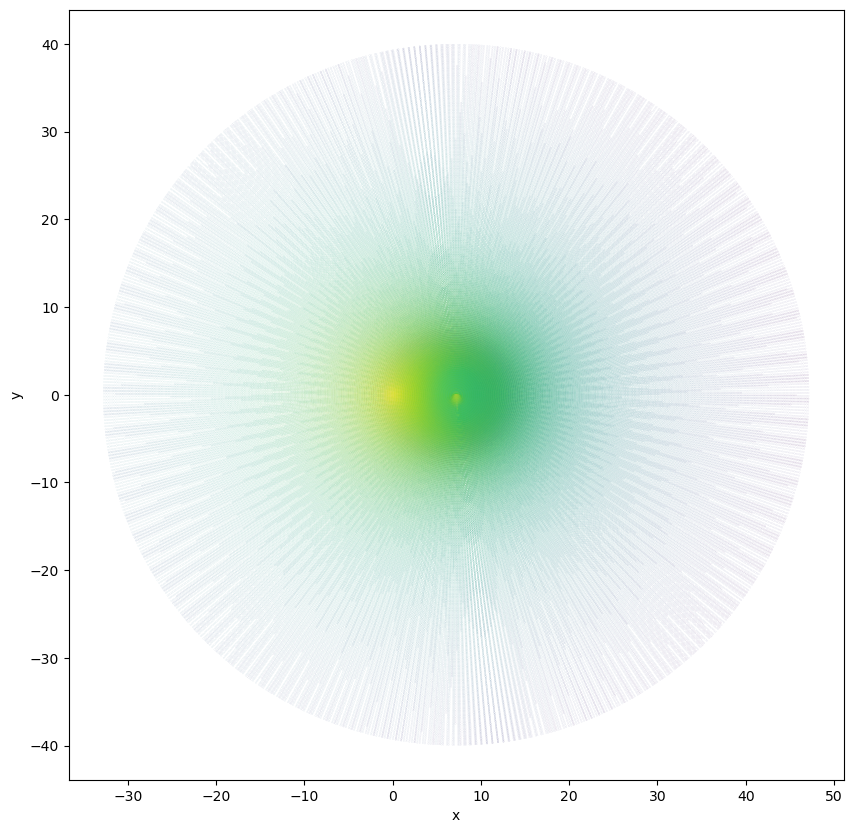

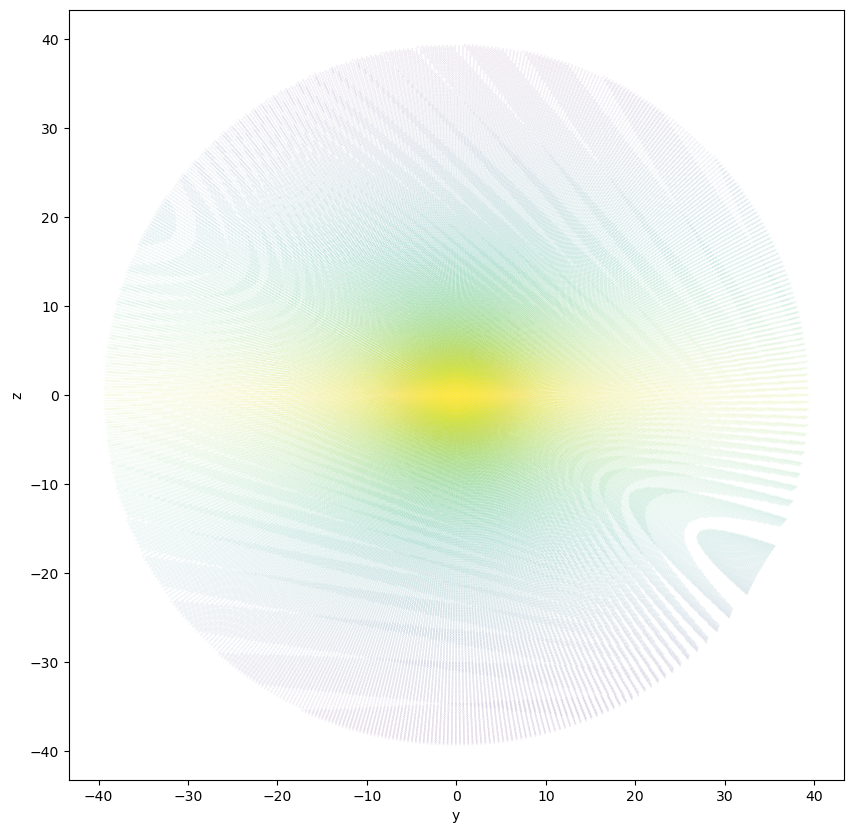

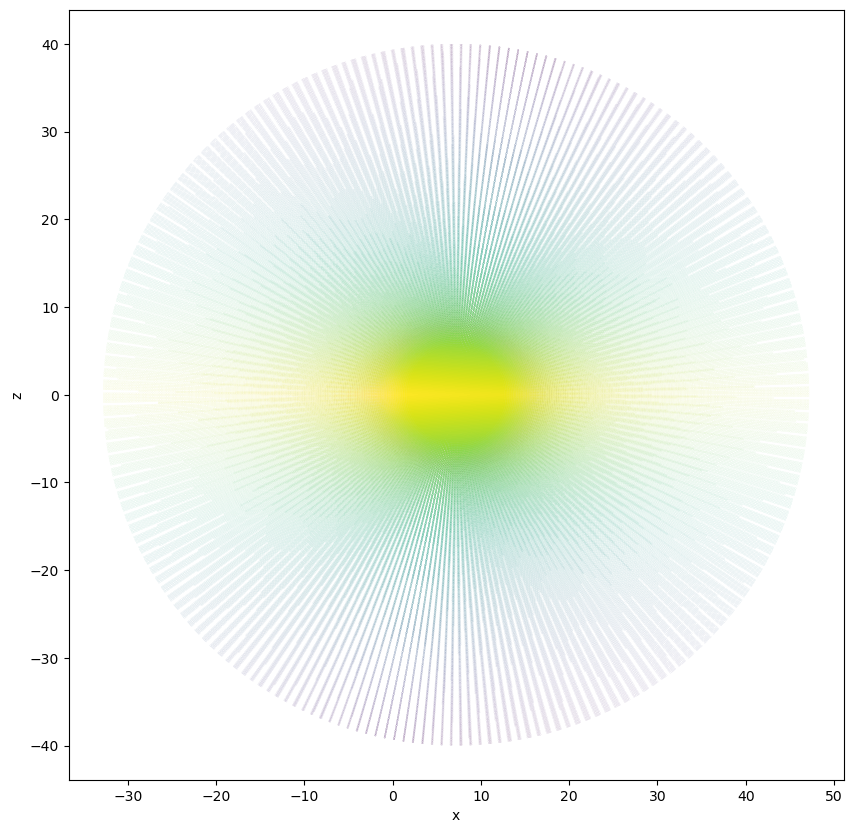

In [137]:
import matplotlib.pyplot as plt


def galaxyslice(a, plane, min, max):
    mask = np.logical_or(np.greater(a[plane], max), np.less(a[plane], min))
    planes = ["x", "y", "z"]
    planes.remove(plane)

    ax = np.ma.masked_array(a[planes[0]], mask=mask).compressed()
    ay = np.ma.masked_array(a[planes[1]], mask=mask).compressed()
    ap = np.ma.masked_array(a['logp'], mask=mask).compressed()

    fig, ax1 = plt.subplots(1,1)
    ax1.scatter(ax, ay, s=0.001, c=ap)
    #_,_,_,_ = plt.hist2d(ax, ay, weights=ap, bins=(50,50))
    ax1.set_xlabel(planes[0])
    ax1.set_ylabel(planes[1])
    fig.set_size_inches(10,10)
    


galaxyslice(a,"z", -1, 1)
galaxyslice(a,"x", -1, 1)
galaxyslice(a,"y", -1, 1)


In [155]:
import numpy as np
b = np.loadtxt("/home/mtauraso/src/ldasoft/rundir70/3dsphereprior.dat", 
               [('costheta', 'double'), ('phi', 'double'), ('r', 'double'), ('logp', 'double')])

print(np.max(b['costheta']),np.min(b['costheta']))
print(np.max(b['phi'])/(2*np.pi),np.min(b['phi'])/(2*np.pi))

0.995 -0.995
0.997499945264763 0.0024999994798897683


In [156]:
print(np.max(b['costheta']),np.min(b['costheta']))
print(np.max(b['phi'])/(2*np.pi),np.min(b['phi'])/(2*np.pi))

0.995 -0.995
0.997499945264763 0.0024999994798897683


In [157]:
dr = 40.0/200
dcostheta = 2./200
dphi = 2*np.pi/200
print(f"dr {dr} dcostheta {dcostheta} dphi {dphi}")
print(f"p summed over dVol {np.sum(np.exp(b['logp'])*b['r']*b['r']*dr*dcostheta*dphi)}")
print(f"p summed over all bins {np.sum(np.exp(b['logp']))}")
print(f"p summed over dOmega {np.sum(np.exp(b['logp'])*dcostheta*dphi)}")
print(f"p summed over d(phase space volume) {np.sum(np.exp(b['logp'])*dcostheta*dphi*dr)}")
print((4/3)*np.pi*50**3)

dr 0.2 dcostheta 0.01 dphi 0.031415926535897934
p summed over dVol 40.246187453683405
p summed over all bins 15915.49428450138
p summed over dOmega 4.999999992243984
p summed over d(phase space volume) 0.9999999984487974
523598.7755982988


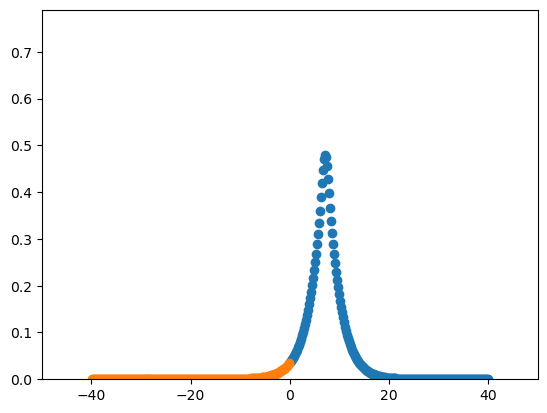

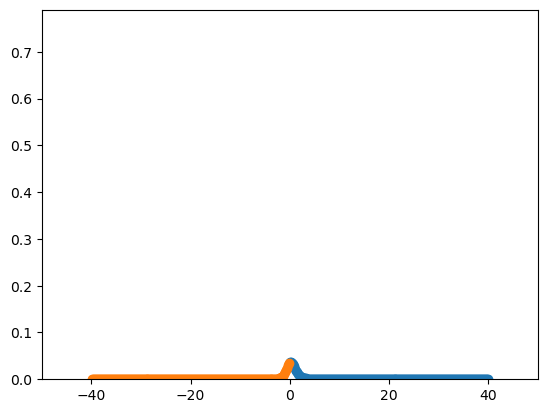

In [158]:
def mask_a(a, costheta, phi):
    dcostheta = 2.0/200.0
    dphi = (2*np.pi) / 200.0

    costheta_max = costheta + dcostheta
    costheta_min = costheta

    phi_max = phi + dphi
    phi_min = phi

    mask_costheta = np.logical_or(np.greater(a['costheta'], costheta_max), np.less(a['costheta'], costheta_min))
    mask_phi = np.logical_or(np.greater(a['phi'], phi_max), np.less(a['phi'], phi_min))

    mask = np.logical_or(mask_costheta, mask_phi)

    ar = np.ma.masked_array(a['r'], mask = mask).compressed()
    ap = np.ma.masked_array(a['logp'], mask=mask).compressed()
    return ar, ap

def galaxyradial(a, costheta, phi):

    max = np.exp(np.max(a['logp']))
    
    ar1, ap1 = mask_a(a, costheta, phi)
    ar2, ap2 = mask_a(a, costheta, (phi + np.pi)%(np.pi*2.0))

    fig, ax = plt.subplots(1,1)

    ax.scatter(ar1, np.exp(ap1))
    ax.scatter(-ar2, np.exp(ap2))

    ax.set_ylim(bottom = 0.0, top = max)
    ax.set_xlim(left=-50, right=50)

galaxyradial(b, 0.0, 3.0*np.pi/2.0)
galaxyradial(b, 0.0, 3.0*np.pi/2.0 + np.pi/8.0+0.001)

In [144]:
print(np.max(a['r']),np.min(a['r']))

ValueError: no field of name r

In [ ]:
phi = np.pi/2.0 + np.pi/8.0
(phi + np.pi)%(np.pi*2.0)

5.105088062083414

p summed over d(phase space) 0.9999999984487974
p summed over d(sky area) 4.999999992243984


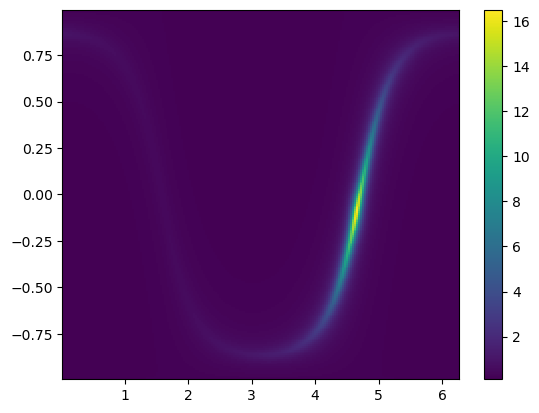

In [162]:
# make a skymap

dr = 40.0/200 # GALAXY_BS_R/Nr (defined in GalacticBinaryPrior.h)
dcostheta = 2./200 
dphi = 2*np.pi/200
_ = plt.hist2d(b['phi'], b['costheta'], weights=np.exp(b['logp']), bins=(200,200))
plt.colorbar()

print(f"p summed over d(phase space) {np.sum(np.exp(b['logp'])*dcostheta*dphi*dr)}")
print(f"p summed over d(sky area) {np.sum(np.exp(b['logp'])*dcostheta*dphi)}")

p summed over all bins 3183.098919878712
p summed over dOmega 1.0000000182340572


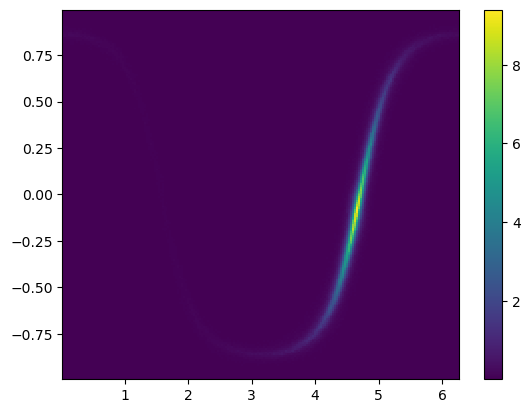

In [130]:
dr = 50.0/200
dcostheta = 2./200
dphi = 2*np.pi/200
c = np.loadtxt("/home/mtauraso/src/ldasoft/rundir70/skyprior.dat", 
               [('phi', 'double'),('costheta', 'double'), ('logp', 'double')])
_ = plt.hist2d(c['phi'], c['costheta'], weights=np.exp(c['logp']), bins=(200,200))
plt.colorbar()
print(f"p summed over all bins {np.sum(np.exp(c['logp']))}")
print(f"p summed over dOmega {np.sum(np.exp(c['logp'])*dcostheta*dphi)}")

In [119]:
phi1 = 3*np.pi/2.0
print(phi1)
bucket1 = ((2*np.pi-phi1)/(2*np.pi)) * 200
print(bucket1)
phi2 = 2.0*np.pi*(bucket1+0.5)/200
print(phi2)

4.71238898038469
50.0
1.5865042900628454


In [116]:
2.0*np.pi*(193+0.5)/200

6.07898178469625

In [121]:
A_g = [[-0.0548755604162154, +0.4941094278755837, -0.8676661490190047],
       [-0.8734370902348850, -0.4448296299600112, -0.1980763734312015],
       [-0.4838350155487132, +0.7469822444972189, +0.4559837761750669]]
e =(84381.406)*(4.848136811095359935899141e-6) 
M = [[1,0,0],[0,np.cos(e), np.sin(e)],[0,-np.sin(e), np.cos(e)]]

np.dot(M, A_g)

array([[-5.48755604e-02,  4.94109428e-01, -8.67666149e-01],
       [-9.93821359e-01, -1.10990909e-01, -3.51691135e-04],
       [-9.64768285e-02,  8.62285852e-01,  4.97147192e-01]])

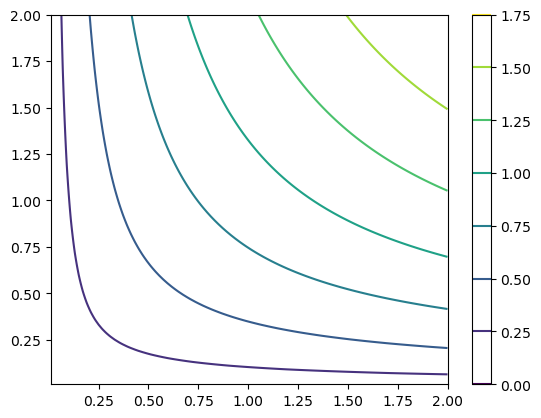

In [167]:
import numpy as np
m1 = np.linspace(0.01,2,100)
m2 = np.linspace(0.01,2,100)
m1v, m2v = np.meshgrid(m1,m2)

mchirp = (m1v*m2v)**(3/5) * (m1v + m2v)**(-1/5)

plt.contour(m1v, m2v, mchirp)
plt.colorbar()